In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
pytrend = TrendReq(hl = 'en-US', tz = 360)

In [4]:
_payload = pytrend.build_payload(kw_list=["amazon", "netflix", "facebook", "tesla"], geo = "US")

panda_payload = pytrend.interest_over_time()

In [6]:
tesla_trend = panda_payload["tesla"].tolist() #elonmusk
amazon_trend = panda_payload["amazon"].tolist() 
facebook_trend = panda_payload["facebook"].tolist() 
netflix_trend = panda_payload["netflix"].tolist()

# time_trend = panda_payload["date"].tolist()


In [16]:
time_chunks = (list)(range(len(panda_payload)))
# print(time_chunks)

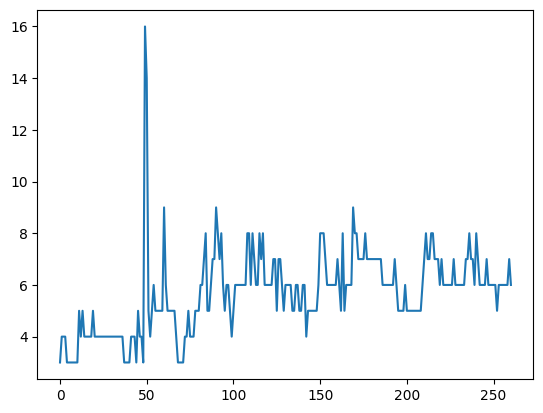

In [19]:
plt.plot(time_chunks, tesla_trend) # test ca sa vad cum returneaza api-ul asta valorile

DatetimeIndex(['2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30',
               '2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10',
               ...
               '2023-10-01', '2023-10-08', '2023-10-15', '2023-10-22',
               '2023-10-29', '2023-11-05', '2023-11-12', '2023-11-19',
               '2023-11-26', '2023-12-03'],
              dtype='datetime64[ns]', name='date', length=261, freq=None)


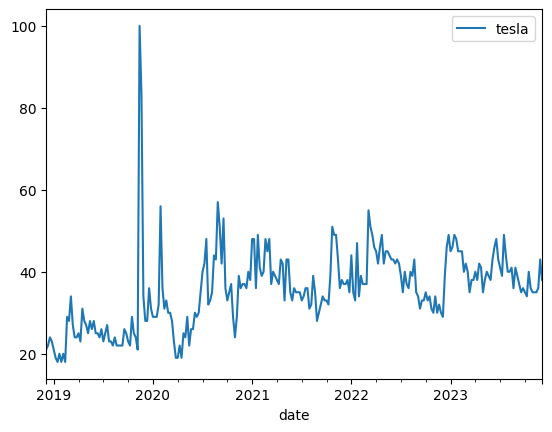

In [31]:
pytrend.build_payload(kw_list=["tesla"], geo = "US")
panda_payload_new = pytrend.interest_over_time()
tesla_trend_new = panda_payload_new["tesla"].tolist() #elonmusk
panda_payload_new.plot()
# df = panda_payload_new.head()
# print(df)
# plt.plot(time_chunks, tesla_trend_new)

Acum incercam sa observam o corelatie basic intre trend si pret (fara niciun sentiment analysis, sa vedem plain o diferenta ori pozitiva ori negativa)

In [34]:
import yfinance as yf

In [62]:
def see_correlation(symbol: str, name : str) :
    global pytrend
    pytrend.build_payload(kw_list=[name], geo = "US")
    _payload_new = pytrend.interest_over_time()
    _trend_new = _payload_new[name].tolist() #elonmusk
    _payload_new.plot()
    _time = _payload_new.index
    _price = yf.Ticker(symbol)
    
    _price_history = _price.history(start=_time.tolist()[0],end=_time.tolist()[-1])
    _open_price_history = _price_history["Open"]
    print(_open_price_history)
    _open_price_history.plot()

Date
2018-12-10 00:00:00-05:00     81.192001
2018-12-11 00:00:00-05:00     83.900002
2018-12-12 00:00:00-05:00     83.449997
2018-12-13 00:00:00-05:00     84.000000
2018-12-14 00:00:00-05:00     81.900002
                                ...    
2023-11-27 00:00:00-05:00    147.529999
2023-11-28 00:00:00-05:00    146.979996
2023-11-29 00:00:00-05:00    147.850006
2023-11-30 00:00:00-05:00    144.759995
2023-12-01 00:00:00-05:00    146.000000
Name: Open, Length: 1254, dtype: float64


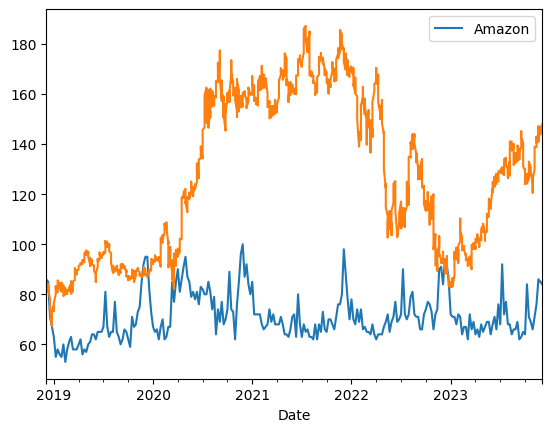

In [63]:
see_correlation("AMZN", "Amazon")

Date
2018-12-10 00:00:00-05:00    264.190002
2018-12-11 00:00:00-05:00    274.079987
2018-12-12 00:00:00-05:00    267.660004
2018-12-13 00:00:00-05:00    277.640015
2018-12-14 00:00:00-05:00    271.809998
                                ...    
2023-11-27 00:00:00-05:00    479.029999
2023-11-28 00:00:00-05:00    478.109985
2023-11-29 00:00:00-05:00    479.000000
2023-11-30 00:00:00-05:00    475.309998
2023-12-01 00:00:00-05:00    473.170013
Name: Open, Length: 1254, dtype: float64


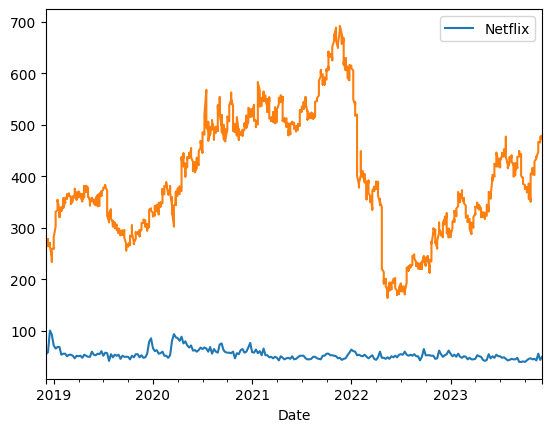

In [64]:
see_correlation("NFLX", "Netflix")